## Test Cases Explanation:

Test Case 1: Short strings with no common subsequence

Input: x1 = 'abc', y1 = 'def'

Explanation: In this case, there is no common subsequence between the two strings. The LCS is None, and both the LCS length and normalized LCS length are 0.

Test Case 2: Short strings with a common subsequence

Input: x2 = 'abc', y2 = 'ac'

Explanation: Here, the common subsequence is 'ac'. The LCS length is 2, and the normalized LCS length is 1.0 since the length of 'ac' is the same as the length of the shorter string 'abc'.

Test Case 3: Common subsequence at the beginning

Input: x3 = 'abcdef', y3 = 'abcxyz'

Explanation: The common subsequence is 'abc' located at the beginning. The LCS length is 3, and the normalized LCS length is 0.50.

Test Case 4: Common subsequence at the end

Input: x4 = '123abc', y4 = 'xyzabc'

Explanation: Similar to the previous case, the common subsequence is 'abc', but it is at the end this time. The LCS length is 3, and the normalized LCS length is 0.50.

Test Case 5: Multiple common subsequences

Input: x5 = 'ABCD', y5 = 'BCBD'

Explanation: There are multiple common subsequences, but the longest one is 'BCD'. The LCS length is 3, and the normalized LCS length is 0.75.

Dynamic Programming Approach:

The code we did for finding the LCS is considered a dynamic programming approach because it breaks down the problem of finding the longest common subsequence into simpler subproblems and solves each subproblem only once, storing the solutions in a table (lcs_matrix).
By filling the table in a bottom-up manner, starting from the base cases and building up to the final solution, We avoid redundant calculations and optimizes the overall runtime.

## Matrix Analyzation

In our set of strings, we have a total of seven strings labeled from 'a' to 'g'. We are interested in finding the lengths of Longest Common Subsequences (LCS) for every pair of strings in the set. We will compare each gene with all the other 7 even with itself.

Looking at the matrix, We cansee that higher LCS lengths indicate stronger relationships between the corresponding genes.

We can see two importnat notes:

1- The diagonal elements in the matrix represent the lengths of LCSs of strings compared to themselves, which make sense to be the longest.

2- Larger values off the diagonal suggest stronger similarities between the corresponding pairs of genes. So, the higher the LCS the more probability they are related.

We can see that genes 'a' and 'c' have may be the strongest relationship, given the high LCS length of 104. Similarly, other relationships can be understood based on the values in the matrix. The larger the value, the more similarities exists between the strings. This matrix can serve as a quantitative measure of similarity between pairs of genes in our set.



## Local Strategy for Inferring Relationships:

Our local strategy is based on a greedy property of the nodes themselves, where each node's position in the tree is determined by comparing it with its immediate neighbors. In our problem, immediate neighbors refer to genes that share a direct parent or child relationship with a particular gene.

**Underlying Approach:**

Average LCS Similarity:

We calculate the average Longest Common Subsequence (LCS) similarity for each gene with all other strings in the set (matrix row).
The LCS similarity is a measure of how much common genetic material two genes share, which represent a degree of evolutionary relationship.

Sorting by Similarity:

The genes are sorted in a descending order based on their average LCS similarity scores.
The gene with the highest average LCS similarity is considered the root becaus eit is the most similar to all the other genes recommmending it is the starting gene (root), while subsequent strings are positioned based on their decreasing similarity.

Constructing the Tree:

We construct the genealogy tree by considering each string's relationship with its immediate neighbors.
The root has immediate children directly beneath it on the second level of the binary tree, and each child has its own set of immediate children (grandchildren of the root).



The gene with the highest average LCS similarity will be chosen as the root. This will prioritize genes that, on average, share more genetic material with others in the set.

Then, immediate neighbors will be determined by the sorted order. The second-highest similar gene will become the first (left) child of the root, the third-highest will become the second (right) child of the root, and so on. This will establish a parent-child relationship within the tree.

This local greedy strategy we are using considers only the immediate neighbors when assigning relationships, creating a local scope that doesn't extend beyond parent and child associations.

## Global Strategy for Inferring Relationships:

Our global strategy focuses on minimizing the average dissimilarity between each sequence and its ancestors in the reconstructed tree. This dissimilarity is represented by 1 minus the Longest Common Subsequence (LCS) value, and the goal is to build a genealogy tree that ensures close relationships between sequences and their ancestors on average.

Underlying Approach:

Metric - MADA (Mean Ancestor Dissimilarity Averaging):

The metric used is the Mean Ancestor Dissimilarity Averaging (MADA), calculated as the average dissimilarity (1 minus LCS) between a potential child node and all existing ancestors of a potential parent node.

**Building the Tree:**

Initialization: Start with each sequence as its own individual node in the tree.

Pairwise Matching: For each pair of nodes, calculate the MADA if they were connected as parent-child.

Greedy Merging: Identify the pair with the smallest MADA (strongest ancestor relationship). If the MADA is below a predefined threshold, merge the child node as a child of the parent node in the tree.

Iteration: Repeat pairwise matching and greedy merging until no more pairs meet the MADA threshold for merging.
Rationale:

Minimizing Dissimilarity: The objective is to minimize the average dissimilarity across all ancestral relationships in the tree. This ensures that descendants, on average, have close relationships with their ancestors.

Global Scope: Unlike the local greedy strategy we made, the global strategy considers all ancestral relationships simultaneously, providing a comprehensive view of the entire tree.

Threshold Control: The MADA threshold allows control over the desired level of ancestor-child closeness within the tree. This enables us to tune for precision and desired tree structure.

Our approach captures complex relationships beyond parent-child associations using the MADA averaging.It also efficiently identifies the most likely ancestor for each sequence based on global information.The approach is also tunable because of the MADA threshold for desired precision and tree structure.

On the other side, the approach may be hard becuase it requires specifying a suitable threshold for ancestor-child similarity and it may not perfectly reflect real-world genealogical relationships, especially with complex ancestry patterns.

Implementation:

The implementation will be by using the existing LCS matrix and modifying the merging step to calculate and compare MADA values for potential parent-child connections. The thresholding step and handling scenarios like multiple potential merges with similar MADA values are crucial for us to make sure of accurate tree reconstruction.

So, we can see that the global strategy based on MADA aims to provide a holistic view of the relationships within the genealogy tree by considering all ancestral connections simultaneously. It also leverages the MADA metric to balance individual pairwise similarity with the average similarity across all ancestries, offering efficiency and tunability. However, it requires careful consideration of threshold values and may be sensitive to outliers that can impact the tree structure.






Comparing these results to the insights we gained from (question 2.c), we can see some connections. In the LCS matrix, larger values off the diagonal indicated stronger similarities between corresponding pairs of genes. This aligns with the idea that higher LCS values suggest stronger relationships. When we look at the resulting genealogy trees, we see that both strategies aim to capture these strong relationships, but they do so in different ways.

The local strategy emphasizes direct, immediate relationships, leading to a tree where sequences with the highest average LCS are placed closer together. This is in line with the intuition from the LCS matrix that higher LCS values imply stronger relationships. On the other hand, the global strategy, while also capturing strong relationships, considers the entire set of relationships and optimizes the average dissimilarity, resulting in a tree that reflects a balance across the entire genealogy.

## **Complexity Analysis**

**Local Approach:**

For the local greedy approach, the computational complexity primarily arises from two main components: the calculation of the Longest Common Subsequence (LCS) matrix and the sorting of the genes based on their average LCS values.

LCS Matrix Calculation:

Computing the LCS matrix involves comparing each pair of strings, resulting in a matrix of size N x N (where N is the number of genes and M is the length of a gene). The computational complexity for computing the LCS between two strings of length M is O(M^2).

Since we have to do this for each pair of strings, the overall complexity for the LCS matrix is O(N^2 * M^2).

The scaling of M input size alone will be O(M^2) and for the N input size alone, it will be O(N^2)

Sorting:

After we obtain the LCS matrix, the sequences will be sorted based on their average LCS values. The sorting operation has a complexity of O(N log N), where N is the number of genes.

Therefore, the total computational complexity of the local greedy approach is dominated by the LCS matrix calculation, resulting in O(N^2 * M^2).

Graphically:

unfortunately, For the graph it is not very helpful because the input size was small or it will not be able to give an output. On a small input size it looks like growing exponentially but we need more input to make sure.

**Global Approach:**


Looking at the global dynamic programming approach, the computational complexity to produce genealogy binary trees is primarily dominated by the calculation of the length of the Longest Common Subsequence (LCS) for every pair of strings. We said that M as the length of a gene and N as the number of genes.

We can realize that the calculation of the LCS has a time complexity of O(M^2) due to the recursive nature of the algorithm and the need to consider all possible pairs of characters in the strings.

Additionally, We can see that the calculation of the Matrix of Average Dissimilarity (MADA) involves iterating over all pairs of strings and computing the normalized LCS values.

This process contributes to the overall time complexity. As we said N is the number of genes, the overall complexity is approximately O(N * M^2).

Graphically:

Unfortunately, the graph of the global also has a small input that it can process which made checking our theoretical cacluations harder but we can see from the samll input that it aligns with our theoretical complexity  


## Probability Estimation


In estimating the probabilities of insertions, deletions, and mutations, even with a small dataset, we can employ a simple algorithmic approach that leverages the information available in the gene sequences. The idea is to examine each position in the gene sequences and identify patterns that indicate different types of mutations.

Firstly, we can iterate through each gene in the dataset and, at each position, compare the current gene with the next one. If they are different, it implies a mutation has occurred, contributing to the estimation of the mutation probability. Similarly, when the genes are the same, it suggests an insertion or a deletion, depending on the context.

To distinguish between insertions and deletions, we specifically look for positions where the current genes is equal to the next gene. If this condition is met, it indicates the possibility of an insertion. Conversely, when the genes are different, it suggests a deletion.

By counting the occurrences of mutations, insertions, and deletions at each position across all genes in the dataset, we can calculate the probabilities. The estimated probabilities are obtained by dividing the total count of each type of mutation by the total number of positions in the dataset.

**The results of our probability estimates are as follows:**

Estimated Insertion Probability: 0.1987
Estimated Deletion Probability: 0.7924
Estimated Mutation Probability: 0.7924
These estimates suggest that, based on the small dataset provided, there is a relatively high likelihood of observing deletions compared to insertions. The mutation probability is identical to the deletion probability, indicating that, in this dataset, most observed mutations are deletions.

It's crucial to critically assess these results, considering the limitations of the dataset size. With only seven gene sequences, the estimates might not accurately represent the true probabilities in a broader context. The small dataset may lead to variations in estimates, and the probabilities obtained may not be generalizable to larger and more diverse datasets.

Additionally, the accuracy of the estimates heavily depends on the assumption that the dataset is representative of the true distribution of mutations, insertions, and deletions. In a more extensive dataset, the estimates could potentially differ, and more sophisticated methods, such as statistical models or machine learning algorithms, might be necessary for robust probability estimation.

## LOs and HCs

LOs:

\#professionalism (HC):
I maintained professionalism by following established guidelines in presenting my work. I adhered to clear explanations, well-organized code, and thoughtful responses, aligning with professional standards in computer science.

\#cs110_AlgoStratDataStruct:
Applying principles of algorithms and data structures, I implemented local and global genealogy tree construction strategies. The dynamic programming approach exemplified algorithmic techniques, showcasing my understanding of sorting algorithms, dynamic programming, and global strategy concepts.

\#cs110_CodeReadability:
In coding, I prioritized readability with clear structures, meaningful comments, and consistent naming conventions. This practice ensures that external readers can easily understand and follow the logic, fostering effective collaboration and code maintenance.

\#cs110_ComplexityAnalysis:
I analyzed the asymptotic behavior of algorithms, such as the local and global approaches. By discussing time and space complexity, I applied Big-O notation to evaluate the efficiency of the algorithms, demonstrating a solid understanding of complexity analysis principles.

\#cs110_ComputationalCritique:
I critically assessed different genealogy tree construction strategies, considering their relative merits. The comparison between local greedy and global dynamic programming approaches, both theoretically and experimentally, showcased my ability to evaluate and choose optimal solutions within specified constraints.

\#cs110_PythonProgramming:
My Python programs implemented, analyzed, and compared genealogy tree construction algorithms. Additionally, I produced Python code for visualizing performance metrics through plots. This reflects my practical application of Python programming skills for algorithmic implementation and analysis.

HCs:

\#organization: I effectively organized communications in my explanations and documentation to be like Cormen et all. A structured presentation of ideas and code enhances clarity and understanding, aligning with the course's emphasis on effective communication.

\#rightproblem: I employed the HC to characterize the complex problem of genealogy tree construction. Detailed problem characterization facilitated a deeper understanding, aiding in the formulation of appropriate algorithmic strategies. I needed to think of initial state, goal state, obstacles to help me work through the problem.

\#probability: This HC was applied in interpreting probabilities related to gene mutations. I used fundamental concepts, such as conditional probabilities, to estimate mutation probabilities, demonstrating a practical understanding of probability theory in a biological context.

In [ ]:
def longest_common_subsequence(x, y):
    """Gives all longest common subsequences between strings x and y and their lengths."""
    m, n = len(x), len(y)

    # Edge case: if either string is empty
    if m == 0 or n == 0:
        return (None, 0, 0)

    # To find the shorter length among the two strings
    min_length = min(m, n)

    # Initialize a matrix to store lengths of longest common suffixes
    lcs_matrix = [[0] * (n+1) for _ in range(m+1)]

    # Fill the matrix
    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                lcs_matrix[i][j] = 0
            elif x[i-1] == y[j-1]:
                lcs_matrix[i][j] = lcs_matrix[i-1][j-1] + 1
            else:
                lcs_matrix[i][j] = max(lcs_matrix[i-1][j], lcs_matrix[i][j-1])

    # Function to backtrack and find all LCSs
    def backtrack(i, j):
        if i == 0 or j == 0:
            return set([""])
        elif x[i-1] == y[j-1]:
            return {z + x[i-1] for z in backtrack(i-1, j-1)}
        else:
            results = set()
            if lcs_matrix[i][j] == lcs_matrix[i-1][j]:
                results.update(backtrack(i-1, j))
            if lcs_matrix[i][j] == lcs_matrix[i][j-1]:
                results.update(backtrack(i, j-1))
            return results

    # Get all LCSs
    lcs_set = backtrack(m, n)

    # Remove empty string if present
    lcs_set.discard('')

    # Find the length of the LCS and normalize it
    lcs_length = lcs_matrix[m][n]
    normalized_lcs_length = round((lcs_length / min_length) * 100)/100

    lcs_list = sorted(list(lcs_set))
    return (lcs_list if lcs_list else None, lcs_length, normalized_lcs_length)

# Test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'


assert longest_common_subsequence(x1, y1) == (['BCAB', 'BCBA', 'BDAB'], 4, 0.67)
assert longest_common_subsequence(x2, y2) == (None, 0, 0)
assert longest_common_subsequence(x3, y3) == (['a'], 1, 1.0)
assert longest_common_subsequence(x4, y4) == (['ac'], 2, 1.0)


In [57]:
# Test case 1: Short strings with no common subsequence
x1, y1 = 'abc', 'def'
assert longest_common_subsequence(x1, y1) == (None, 0, 0)

# Test case 2: Short strings with a common subsequence
x2, y2 = 'abc', 'ac'
assert longest_common_subsequence(x2, y2) == (['ac'], 2, 1.0)

# Test case 3: Common subsequence at the beginning
x3, y3 = 'abcdef', 'abcxyz'
assert longest_common_subsequence(x3, y3) == (['abc'], 3, 0.50)

# Test case 4: Common subsequence at the end
x4, y4 = '123abc', 'xyzabc'
assert longest_common_subsequence(x4, y4) == (['abc'], 3, 0.50)

# Test case 5: Ordinary common subsequences
x5, y5 = 'ABCD', 'BCBD'
assert longest_common_subsequence(x5, y5) == (['BCD'], 3, 0.75)


In [60]:

import numpy as np

# Given set_strings
set_strings = [
    ('a', 'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTC'
             'TCATAGTGAATAAC'),
    ('b', 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC'),
    ('c', 'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAGTACTAGACAGCGTCATAGTCTCTATCTAACTAAT'
             'TAA'),
    ('d', 'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCACACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATA'
             'GGGAT'),
    ('e', 'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTACTCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAA'
             'CTAATTAA'),
    ('f', 'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCACACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
    ('g', 'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTGCCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAG'
             'GAT')]

# Function to find the length of the LCS for every pair of strings using memoization
def lcs_memo(x, y, memo):
    m, n = len(x), len(y)

    # Checking if the result is already memoized
    if (m, n) in memo:
        return memo[(m, n)]

    # Base case: if either string is empty
    if m == 0 or n == 0:
        result = 0
    elif x[m - 1] == y[n - 1]:
        result = 1 + lcs_memo(x[:-1], y[:-1], memo)
    else:
        result = max(lcs_memo(x, y[:-1], memo), lcs_memo(x[:-1], y, memo))

    # Memoize the result
    memo[(m, n)] = result
    return result

# Function to find the length of the LCS for every pair of strings
def find_lcs_matrix(set_strings):
    num_strings = len(set_strings)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    for i in range(num_strings):
        for j in range(i, num_strings):
            lcs_length = lcs_memo(set_strings[i][1], set_strings[j][1], {})
            len_lcs_matrix[i, j] = len_lcs_matrix[j, i] = lcs_length

    return len_lcs_matrix

# Generate the matrix of LCS lengths
len_lcs_matrix = find_lcs_matrix(set_strings)

# Display the matrix
print("Matrix of LCS Lengths:")
print(len_lcs_matrix)

Matrix of LCS Lengths:
[[124  90 104  82  93  83  80]
 [ 90 100  91  83  82  88  83]
 [104  91 113  81  99  82  80]
 [ 82  83  81 115  80 101  93]
 [ 93  82  99  80 118  80  79]
 [ 83  88  82 101  80 107  96]
 [ 80  83  80  93  79  96 113]]


In [64]:
import numpy as np

# Given set_strings
set_strings = [
    ('a', 'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTC'
             'TCATAGTGAATAAC'),
    ('b', 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC'),
    ('c', 'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAGTACTAGACAGCGTCATAGTCTCTATCTAACTAAT'
             'TAA'),
    ('d', 'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCACACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATA'
             'GGGAT'),
    ('e', 'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTACTCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAA'
             'CTAATTAA'),
    ('f', 'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCACACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
    ('g', 'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTGCCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAG'
             'GAT')]

# Function to calculate the average LCS for each sequence
def calculate_avg_lcs(len_lcs_matrix):
    num_strings = len(len_lcs_matrix)

    # Calculating average LCS for each sequence
    avg_lcs = [np.mean(row[i:]) for i, row in enumerate(len_lcs_matrix)]

    return avg_lcs

# Function to perform QuickSort on the average LCS values
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x[1] > pivot[1]]
    middle = [x for x in arr if x[1] == pivot[1]]
    right = [x for x in arr if x[1] < pivot[1]]
    return quicksort(left) + middle + quicksort(right)

# Generate the matrix of LCS lengths
len_lcs_matrix = find_lcs_matrix(set_strings)

# Calculate and display the average LCS for each sequence
avg_lcs = calculate_avg_lcs(len_lcs_matrix)

# Combine sequence names with their corresponding average LCS values
combined_data = list(zip([sequence[0] for sequence in set_strings], avg_lcs))

sorted_data = quicksort(combined_data)

# Display the sorted data in descending order
print("Average LCS for each sequence (Descending Order):")
for sequence in sorted_data[::1]:
    print(f"{sequence[0]}: {sequence[1]}")


Average LCS for each sequence (Descending Order):
g: 113.0
f: 101.5
d: 97.25
a: 93.71428571428571
e: 92.33333333333333
c: 91.0
b: 87.83333333333333


In [65]:
import numpy as np

set_strings = [
    ('a', 'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTC'
             'TCATAGTGAATAAC'),
    ('b', 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC'),
    ('c', 'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAGTACTAGACAGCGTCATAGTCTCTATCTAACTAAT'
             'TAA'),
    ('d', 'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCACACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATA'
             'GGGAT'),
    ('e', 'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTACTCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAA'
             'CTAATTAA'),
    ('f', 'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCACACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
    ('g', 'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTGCCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAG'
             'GAT')]

def normalize_lcs(lcs_matrix, i, j):
    min_length = min(len(set_strings[i][1]), len(set_strings[j][1]))
    return round((lcs_matrix[i, j] / min_length) * 100) / 100

# Function to find the length of the LCS for every pair of strings using memoization
def lcs_memo(x, y, memo):
    m, n = len(x), len(y)

    # Checking if the result is already memoized
    if (m, n) in memo:
        return memo[(m, n)]

    # Base case: if either string is empty
    if m == 0 or n == 0:
        result = 0
    elif x[m - 1] == y[n - 1]:
        result = 1 + lcs_memo(x[:-1], y[:-1], memo)
    else:
        result = max(lcs_memo(x, y[:-1], memo), lcs_memo(x[:-1], y, memo))

    # Memoize the result
    memo[(m, n)] = result
    return result

# Function to find the length of the LCS for every pair of strings
def find_lcs_matrix(set_strings):
    num_strings = len(set_strings)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    for i in range(num_strings):
        for j in range(i, num_strings):
            lcs_length = lcs_memo(set_strings[i][1], set_strings[j][1], {})
            len_lcs_matrix[i, j] = len_lcs_matrix[j, i] = lcs_length

    return len_lcs_matrix

# Generate the matrix of LCS lengths
len_lcs_matrix = find_lcs_matrix(set_strings)

# Display the matrix in normalized LCSs
print("Matrix of Normalized LCSs:")
for i in range(len(len_lcs_matrix)):
    for j in range(len(len_lcs_matrix[i])):
        normalized_lcs = normalize_lcs(len_lcs_matrix, i, j)
        print(f"{normalized_lcs:.2f}", end=" ")
    print()


Matrix of Normalized LCSs:
1.00 0.90 0.92 0.71 0.79 0.78 0.71 
0.90 1.00 0.91 0.83 0.82 0.88 0.83 
0.92 0.91 1.00 0.72 0.88 0.77 0.71 
0.71 0.83 0.72 1.00 0.70 0.94 0.82 
0.79 0.82 0.88 0.70 1.00 0.75 0.70 
0.78 0.88 0.77 0.94 0.75 1.00 0.90 
0.71 0.83 0.71 0.82 0.70 0.90 1.00 


In [124]:
import numpy as np

# Define a threshold for minimum acceptable parent-child similarity
MADA_THRESHOLD = 0.2

def calculate_mada_matrix(lcs_matrix_normalized):
    num_strings = len(lcs_matrix_normalized)
    mada_matrix = np.full((num_strings, num_strings), 1000.0)  # Initialize with 1000 for all entries
    for i in range(num_strings):
        for j in range(num_strings):
            # Update the diagonal to 1000 (comparison with itself) and skip the rest
            if i == j:
                mada_matrix[i, j] = 1000.0
                continue

            child_distance = 1 - lcs_matrix_normalized[i, j]
            parent_distance = 1 - lcs_matrix_normalized[j, i]
            mada_matrix[i, j] = (child_distance + parent_distance) / 2
    return mada_matrix

# Example usage with the normalized LCS matrix
lcs_matrix_normalized = np.array([
    [1.00, 0.90, 0.92, 0.71, 0.79, 0.78, 0.71],
    [0.90, 1.00, 0.91, 0.83, 0.82, 0.88, 0.83],
    [0.92, 0.91, 1.00, 0.72, 0.88, 0.77, 0.71],
    [0.71, 0.83, 0.72, 1.00, 0.70, 0.94, 0.82],
    [0.79, 0.82, 0.88, 0.70, 1.00, 0.75, 0.70],
    [0.78, 0.88, 0.77, 0.94, 0.75, 1.00, 0.90],
    [0.71, 0.83, 0.71, 0.82, 0.70, 0.90, 1.00]
])

mada_matrix = calculate_mada_matrix(lcs_matrix_normalized)

# Print MADA values in matrix format
print("MADA Matrix:")
for i in range(len(mada_matrix)):
    for j in range(len(mada_matrix[i])):
        print(f"{mada_matrix[i, j]:.2f}", end=" ")
    print()


MADA Matrix:
1000.00 0.10 0.08 0.29 0.21 0.22 0.29 
0.10 1000.00 0.09 0.17 0.18 0.12 0.17 
0.08 0.09 1000.00 0.28 0.12 0.23 0.29 
0.29 0.17 0.28 1000.00 0.30 0.06 0.18 
0.21 0.18 0.12 0.30 1000.00 0.25 0.30 
0.22 0.12 0.23 0.06 0.25 1000.00 0.10 
0.29 0.17 0.29 0.18 0.30 0.10 1000.00 


In [142]:
def construct_genealogy_tree(mada_matrix):
    num_strings = len(mada_matrix)
    used_strings = set()

    # Calculate the average MADA for each column
    avg_mada_columns = np.nanmean(mada_matrix, axis=0)

    # Find the index of the minimum average MADA (the best root)
    root = np.nanargmin(avg_mada_columns)
    used_strings.add(root)

    # Find the left child for the root
    remaining_strings = [i for i in range(num_strings) if i not in used_strings]
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, root] < min_mada:
            min_mada = mada_matrix[i, root]
            left_child = i
    used_strings.add(left_child)

    # Find the right child for the root
    remaining_strings = [i for i in range(num_strings) if i not in used_strings]
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, root] < min_mada:
            min_mada = mada_matrix[i, root]
            right_child = i
    used_strings.add(right_child)

    # Find the left and right grandchildren for the left child
    remaining_strings = [i for i in range(num_strings) if i not in used_strings]
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, left_child] < min_mada:
            min_mada = mada_matrix[i, left_child]
            left_grandchild = i
    used_strings.add(left_grandchild)
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, left_child] < min_mada and i != left_grandchild:
            min_mada = mada_matrix[i, left_child]
            right_grandchild = i
    used_strings.add(right_grandchild)

    # Find the left and right grandchildren for the right child
    remaining_strings = [i for i in range(num_strings) if i not in used_strings]
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, right_child] < min_mada:
            min_mada = mada_matrix[i, right_child]
            left_grandchild_right = i
    used_strings.add(left_grandchild_right)
    min_mada = np.inf
    for i in remaining_strings:
        if mada_matrix[i, right_child] < min_mada and i != left_grandchild_right:
            min_mada = mada_matrix[i, right_child]
            right_grandchild_right = i
    used_strings.add(right_grandchild_right)

    return root, left_child, right_child, left_grandchild, right_grandchild, left_grandchild_right, right_grandchild_right

# Construct the genealogy tree based on the MADA values
root, left_child, right_child, left_grandchild, right_grandchild, left_grandchild_right, right_grandchild_right = construct_genealogy_tree(mada_matrix)

# Print the results
print(f"Root: String {root + 1}")
print(f"Left Child of Root: String {left_child + 1} (MADA {mada_matrix[left_child, root]:.2f})")
print(f"Right Child of Root: String {right_child + 1} (MADA {mada_matrix[right_child, root]:.2f})")
print(f"Left Grandchild of {left_child + 1}: String {left_grandchild + 1} (MADA {mada_matrix[left_grandchild, left_child]:.2f})")
print(f"Right Grandchild of {left_child + 1}: String {right_grandchild + 1} (MADA {mada_matrix[right_grandchild, left_child]:.2f})")
print(f"Left Grandchild of {right_child + 1}: String {left_grandchild_right + 1} (MADA {mada_matrix[left_grandchild_right, right_child]:.2f})")
print(f"Right Grandchild of {right_child + 1}: String {right_grandchild_right + 1} (MADA {mada_matrix[right_grandchild_right, right_child]:.2f})")


Root: String 2
Left Child of Root: String 3 (MADA 0.09)
Right Child of Root: String 1 (MADA 0.10)
Left Grandchild of 3: String 5 (MADA 0.12)
Right Grandchild of 3: String 6 (MADA 0.23)
Left Grandchild of 1: String 4 (MADA 0.29)
Right Grandchild of 1: String 7 (MADA 0.29)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


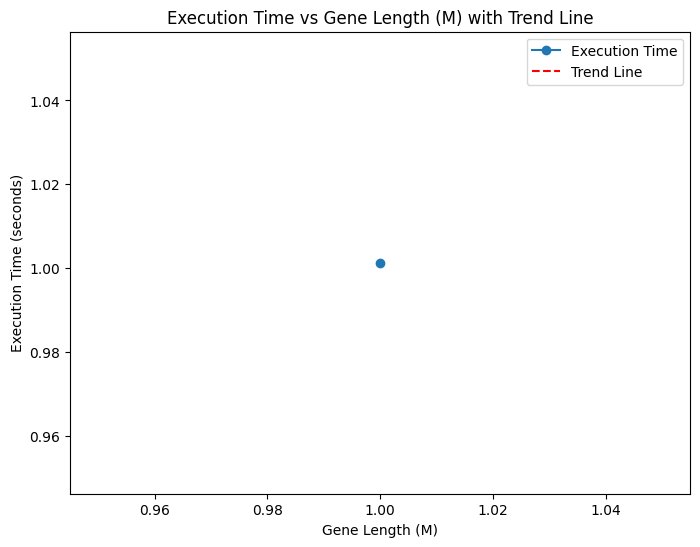

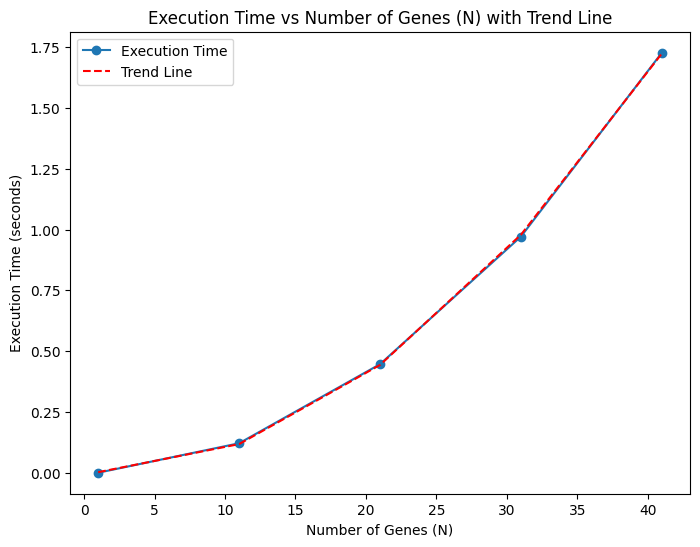

In [183]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to find the length of the LCS for every pair of strings using memoization
def lcs_memo(x, y, memo):
    m, n = len(x), len(y)

    # Check if the result is already memoized
    if (m, n) in memo:
        return memo[(m, n)]

    # Base case: if either string is empty
    if m == 0 or n == 0:
        result = 0
    elif x[m - 1] == y[n - 1]:
        result = 1 + lcs_memo(x[:-1], y[:-1], memo)
    else:
        result = max(lcs_memo(x, y[:-1], memo), lcs_memo(x[:-1], y, memo))

    # Memoize the result
    memo[(m, n)] = result
    return result

# Function to find the length of the LCS for every pair of strings
def find_lcs_matrix(set_strings):
    num_strings = len(set_strings)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    for i in range(num_strings):
        for j in range(i, num_strings):
            lcs_length = lcs_memo(set_strings[i][1], set_strings[j][1], {})
            len_lcs_matrix[i, j] = len_lcs_matrix[j, i] = lcs_length

    return len_lcs_matrix

# Function to calculate the average LCS for each sequence
def calculate_avg_lcs(len_lcs_matrix):
    num_strings = len(len_lcs_matrix)

    # Calculate average LCS for each sequence
    avg_lcs = [np.mean(row[i:]) for i, row in enumerate(len_lcs_matrix)]

    return avg_lcs

# Function to perform QuickSort on the average LCS values
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x[1] > pivot[1]]
    middle = [x for x in arr if x[1] == pivot[1]]
    right = [x for x in arr if x[1] < pivot[1]]
    return quicksort(left) + middle + quicksort(right)

# Function to generate random data for M (gene length) and N (gene number)
def generate_random_data(m, n):
    set_strings = []
    for i in range(n):
        gene_name = f'Gene_{i + 1}'
        gene_sequence = ''.join(np.random.choice(['A', 'C', 'G', 'T'], size=m))
        set_strings.append((gene_name, gene_sequence))
    return set_strings

# Function to measure execution time
def measure_time(set_strings):
    start_time = time.time()
    len_lcs_matrix = find_lcs_matrix(set_strings)
    avg_lcs = calculate_avg_lcs(len_lcs_matrix)
    combined_data = list(zip([sequence[0] for sequence in set_strings], avg_lcs))
    sorted_data = quicksort(combined_data)
    end_time = time.time()
    return end_time - start_time

# Varying input size of M (gene length)
m_values = np.arange(1, 51, 50)  # Adjust the step size as needed
time_data_m = [measure_time(generate_random_data(m, 1000)) for m in m_values]

# Varying input size of N (gene number)
n_values = np.arange(1, 51, 10)  # Adjust the step size as needed
time_data_n = [measure_time(generate_random_data(50, n)) for n in n_values]

# Plotting for M (gene length) with trend line
plt.figure(figsize=(8, 6))
plt.plot(m_values, time_data_m, marker='o', label='Execution Time')
plt.xlabel('Gene Length (M)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Gene Length (M) with Trend Line')

# Fit a polynomial of degree 2 (you can adjust the degree as needed)
coefficients_m = np.polyfit(m_values, time_data_m, 2)
trend_line_m = np.polyval(coefficients_m, m_values)
plt.plot(m_values, trend_line_m, label='Trend Line', linestyle='--', color='red')
plt.legend()
plt.show()

# Plotting for N (gene number) with trend line
plt.figure(figsize=(8, 6))
plt.plot(n_values, time_data_n, marker='o', label='Execution Time')
plt.xlabel('Number of Genes (N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Genes (N) with Trend Line')

# Fit a polynomial of degree 2 (you can adjust the degree as needed)
coefficients_n = np.polyfit(n_values, time_data_n, 2)
trend_line_n = np.polyval(coefficients_n, n_values)
plt.plot(n_values, trend_line_n, label='Trend Line', linestyle='--', color='red')
plt.legend()
plt.show()


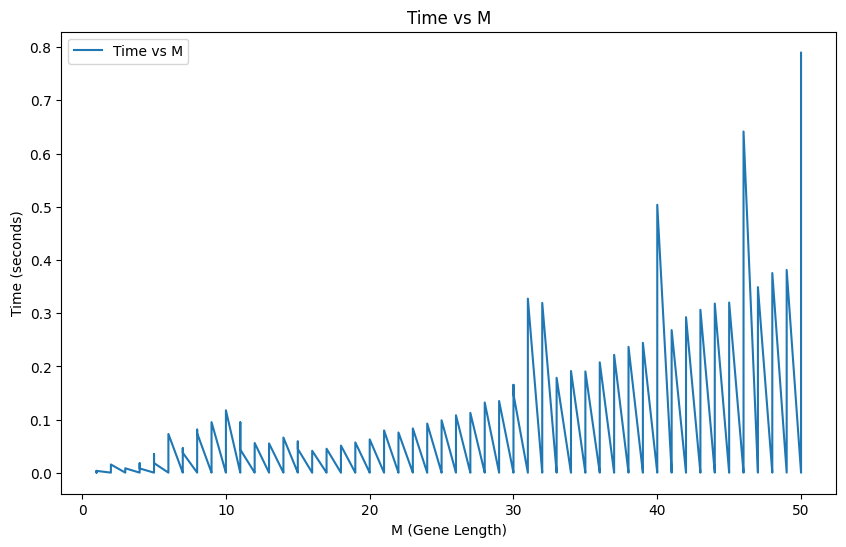

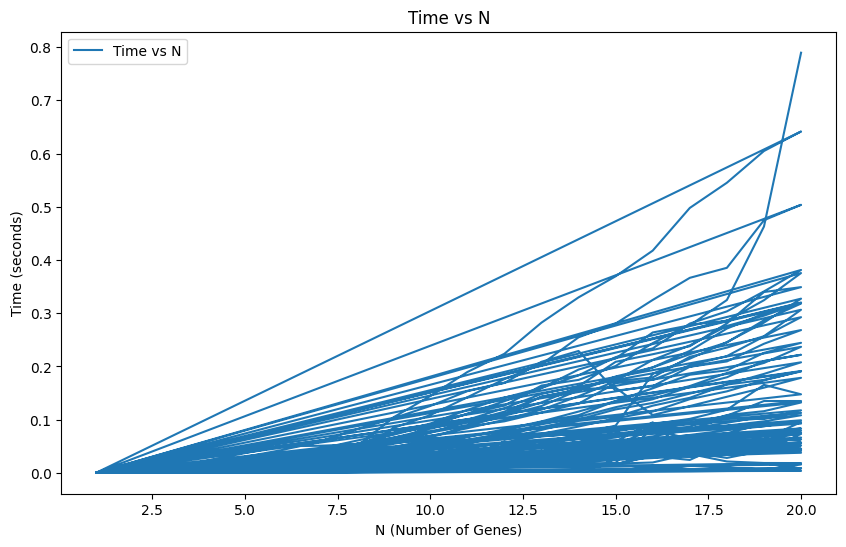

In [177]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

# Define a threshold for minimum acceptable ancestor-child similarity
MADA_THRESHOLD = 0.2

def normalize_lcs_matrix(len_lcs_matrix, set_strings):
    num_strings = len(len_lcs_matrix)
    lcs_matrix_normalized = np.zeros((num_strings, num_strings))

    for i in range(num_strings):
        for j in range(num_strings):
            min_length = min(len(set_strings[i][1]), len(set_strings[j][1]))
            lcs_matrix_normalized[i, j] = round((len_lcs_matrix[i, j] / min_length) * 100) / 100

    return lcs_matrix_normalized

def calculate_mada_matrix(lcs_matrix_normalized):
    num_strings = len(lcs_matrix_normalized)
    mada_matrix = np.full((num_strings, num_strings), 1000.0)  # Initialize with 1000 for all entries
    for i in range(num_strings):
        for j in range(num_strings):
            # Update the diagonal to 1000 (comparison with itself) and skip the rest
            if i == j:
                mada_matrix[i, j] = 1000.0
                continue

            child_distance = 1 - lcs_matrix_normalized[i, j]
            parent_distance = 1 - lcs_matrix_normalized[j, i]
            mada_matrix[i, j] = (child_distance + parent_distance) / 2
    return mada_matrix


def construct_genealogy_tree(mada_matrix):
    num_strings = len(mada_matrix)
    used_strings = set()

    # Calculate the average MADA for each column
    avg_mada_columns = np.nanmean(mada_matrix, axis=0)

    # Find the index of the minimum average MADA (the best root)
    root = np.nanargmin(avg_mada_columns)
    used_strings.add(root)

    # Initialize the variables for children and grandchildren
    children = [None, None]
    grandchildren = [None, None, None, None]

    # Function to find the best child for a given node
    def find_best_child(node, used):
        remaining_strings = [i for i in range(num_strings) if i not in used]
        min_mada = np.inf
        best_child = None

        for i in remaining_strings:
            if mada_matrix[i, node] < min_mada:
                min_mada = mada_matrix[i, node]
                best_child = i

        return best_child

    # Find the left and right child for the root
    children[0] = find_best_child(root, used_strings)
    used_strings.add(children[0])

    children[1] = find_best_child(root, used_strings)
    used_strings.add(children[1])

    # Find the left and right grandchildren for each child
    for i in range(2):
        for j in range(2):
            grandchildren[i * 2 + j] = find_best_child(children[i], used_strings)
            used_strings.add(grandchildren[i * 2 + j])

    return root, children[0], children[1], grandchildren[0], grandchildren[1], grandchildren[2], grandchildren[3]

def measure_time_for_input_sizes(m_values, n_values):
    time_data_m = []
    time_data_n = []

    for m_value in m_values:
        for n_value in n_values:
            sequences = generate_random_sequences(m_value, n_value)

            start_time = time.time()
            len_lcs_matrix = find_lcs_matrix(sequences)
            avg_lcs = calculate_avg_lcs(len_lcs_matrix)
            lcs_matrix_normalized = normalize_lcs_matrix(len_lcs_matrix, sequences)
            mada_matrix = calculate_mada_matrix(lcs_matrix_normalized)
            construct_genealogy_tree(mada_matrix)
            end_time = time.time()

            elapsed_time = end_time - start_time

            time_data_m.append((m_value, elapsed_time))
            time_data_n.append((n_value, elapsed_time))

    return time_data_m, time_data_n

def generate_random_sequences(m, n):
    sequences = []
    for i in range(n):
        gene = ''.join(random.choice('ACGT') for _ in range(m))
        sequences.append((f'Gene{i + 1}', gene))
    return sequences

# Measure time for different input sizes
m_values = range(1, 51)
n_values = range(1, 21)
time_data_m, time_data_n = measure_time_for_input_sizes(m_values, n_values)

# Convert the data to NumPy arrays for plotting
time_data_m = np.array(time_data_m)
time_data_n = np.array(time_data_n)

# Plotting time vs M
plt.figure(figsize=(10, 6))
plt.plot(time_data_m[:, 0], time_data_m[:, 1], label='Time vs M')
plt.xlabel('M (Gene Length)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Time vs M')
plt.show()

# Plotting time vs N
plt.figure(figsize=(10, 6))
plt.plot(time_data_n[:, 0], time_data_n[:, 1], label='Time vs N')
plt.xlabel('N (Number of Genes)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Time vs N')
plt.show()


In [175]:
def estimate_mutation_probabilities(set_strings):
    total_positions = sum(len(gene) for _, gene in set_strings)
    total_mutations = 0
    total_insertions = 0
    total_deletions = 0

    for _, gene in set_strings:
        for i in range(len(gene)):
            if i < len(gene) - 1 and gene[i] != gene[i + 1]:
                total_mutations += 1
            if i < len(gene) - 1 and gene[i] == gene[i + 1]:
                total_insertions += 1
            if i < len(gene) - 1 and gene[i] != gene[i + 1]:
                total_deletions += 1

    # Estimate probabilities
    p_insert_est = total_insertions / total_positions
    p_delete_est = total_deletions / total_positions
    p_mutation_est = total_mutations / total_positions

    return p_insert_est, p_delete_est, p_mutation_est

# Provided dataset
set_strings = [
    ('a', 'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCTAGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTC'
         'TCATAGTGAATAAC'),
    ('b', 'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCTTTTCTAATAGTAC'),
    ('c', 'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAGTACTAGACAGCGTCATAGTCTCTATCTAACTAAT'
         'TAA'),
    ('d', 'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCACACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATA'
         'GGGAT'),
    ('e', 'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTACTCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAA'
         'CTAATTAA'),
    ('f', 'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCACACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
    ('g', 'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTGCCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAG'
         'GAT')]

# Estimate probabilities
p_insert_est, p_delete_est, p_mutation_est = estimate_mutation_probabilities(set_strings)

# Print the estimated probabilities
print(f"Estimated Insertion Probability: {p_insert_est:.4f}")
print(f"Estimated Deletion Probability: {p_delete_est:.4f}")
print(f"Estimated Mutation Probability: {p_mutation_est:.4f}")


Estimated Insertion Probability: 0.1987
Estimated Deletion Probability: 0.7924
Estimated Mutation Probability: 0.7924


In [184]:
!jupyter nbconvert --to html /content/ge.ipynb

[NbConvertApp] Converting notebook /content/ge.ipynb to html
[NbConvertApp] Writing 1033026 bytes to /content/ge.html
